In [24]:
# Load the data
# split the data into train and test set
# build the network architecture
# compile network
# train the network


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

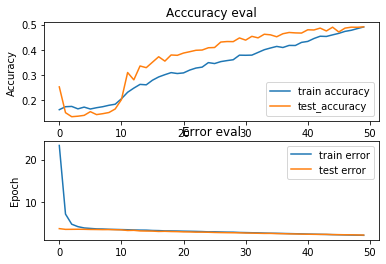

In [23]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
        
    # converting lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

def plot_history(history):
    
    fig, axis = plt.subplots(2)
    
    # create accuracy subplot
    axis[0].plot(history.history["accuracy"], label = "train accuracy" )
    axis[0].plot(history.history["val_accuracy"], label = "test_accuracy" )
    axis[0].set_ylabel("Accuracy")
    axis[0].set_xlabel("Epochs")
    axis[0].legend(loc = "lower right")
    axis[0].set_title("Acccuracy eval")
    
    
    # create error subplot
    axis[1].plot(history.history["loss"], label = "train error" )
    axis[1].plot(history.history["val_loss"], label = "test error" )
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epochs")
    axis[1].legend(loc = "upper right")
    axis[1].set_title("Error eval")
    
    plt.show()



if __name__ == "__main__":

    # Load the data
    inputs, targets = load_data(DATASET_PATH)
    
    # split the data into train and test set
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                             targets,
                                                                             test_size = 0.3)

    
    # build the network architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),
        
        # first hidden layer
        keras.layers.Dense(512, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 2nd hidden layer
        keras.layers.Dense(256, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 3rd hidden layer
        keras.layers.Dense(64, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # output layer
        keras.layers.Dense(10, activation = "softmax")
    ])
    
    # compile Network
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer = optimizer, 
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"]
                 )
    
    model.summary()
    
    # train the network
    history = model.fit(inputs_train,
              targets_train,
              validation_data = (inputs_test, targets_test),
              epochs = 50,
              batch_size = 32
             )
    
    # plot accuracy and error over the epochs
    plot_history(history)


In [13]:
print(inputs.shape)
# total samples 9996
# 130 mfcc vectors
# 13 is the mfcc_coefficient
print(inputs.shape[2])

print(targets.shape)

(9996, 130, 13)
13
(9996,)


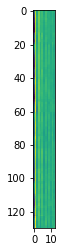

In [27]:
plt.imshow(inputs[2])

# MY PERFECT WORKING MODEL

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

def plot_history(history):
    
    fig, axis = plt.subplots(2)
    
    # create accuracy subplot
    axis[0].plot(history.history["accuracy"], label = "train accuracy" )
    axis[0].plot(history.history["val_accuracy"], label = "test_accuracy" )
    axis[0].set_ylabel("Accuracy")
    axis[0].set_xlabel("Epochs")
    axis[0].legend(loc = "lower right")
    axis[0].set_title("Acccuracy eval")
    
    
    # create error subplot
    axis[1].plot(history.history["loss"], label = "train error" )
    axis[1].plot(history.history["val_loss"], label = "test error" )
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epochs")
    axis[1].legend(loc = "upper right")
    axis[1].set_title("Error eval")
    
    plt.show()



if __name__ == "__main__":

    # Load the data
    X, y = load_data(DATASET_PATH)
    
    # split the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3)

    
    # build the network architecture
    model = keras.Sequential([
        # input layer
        keras.layers.Flatten(input_shape = (X.shape[1], X.shape[2])),
        
        # first hidden layer
        keras.layers.Dense(512, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 2nd hidden layer
        keras.layers.Dense(256, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 3rd hidden layer
        keras.layers.Dense(64, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # output layer
        keras.layers.Dense(10, activation = "softmax")
    ])
    
    # compile Network
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer = optimizer, 
                  loss = "sparse_categorical_crossentropy",
                  metrics = "accuracy"
                 )
    
    model.summary()
    
    # train the network
    history = model.fit(X_train,
              y_train,
              validation_data = (X_test, y_test),
              epochs = 50,
              batch_size = 32
             )
    
    # plot accuracy and error over the epochs
    plot_history(history)
